# Introduction to Betti matching

In [1]:
from BettiMatching import *
from evaluation import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

## 1.) Why is topology relevant for image segmentation?

In [2]:
gt = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

p1 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

p2 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0],
               [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

m0, m1 = 4, -4
n0, n1 = 4, -4

gt = gt[m0:m1,n0:n1]
p1 = p1[m0:m1,n0:n1]
p2 = p2[m0:m1,n0:n1]

Here are two possible predictions for a given ground truth segmentation:

Figure(1500x500)


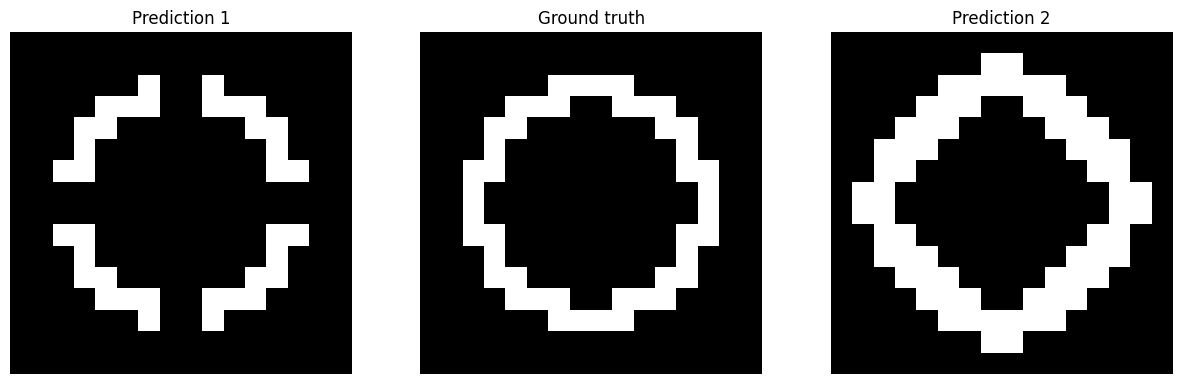

In [3]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 3, 1)
plt.title('Prediction 1')
plt.imshow(p1, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 2)
plt.title('Ground truth')
plt.imshow(gt, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.title('Prediction 2')
plt.imshow(p2, cmap='gray')
plt.axis('off')
print(fig)

Both predictions have advantages. While Predction 1 captures the thickness of the foreground, it fails to capture its topological structure.

But pixel-wise metrics are not able to depict this faithfully:

In [4]:
print('Dice score:')
print('Prediction 1: %.3f' % Dice(p1, gt))
print('Prediction 2: %.3f' % Dice(p2, gt))
print()
print('Accuracy:')
print('Prediction 1: %.3f' % Accuracy(p1, gt))
print('Prediction 2: %.3f' % Accuracy(p2, gt))


Dice score:
Prediction 1: 0.900
Prediction 2: 0.786

Accuracy:
Prediction 1: 0.969
Prediction 2: 0.906


A well established metric to measure the topological performance of a segmentation is given by the Betti number error:

In [5]:
print('Betti number error:')
print('Prediction 1:', BettiMatching(p1, gt, filtration='superlevel').Betti_number_error())
print('Prediction 2:', BettiMatching(p2, gt, filtration='superlevel').Betti_number_error())

Betti number error:
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
Prediction 1: 4
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
num edges: 480
num cubes: 961
compute dim 0
birth uf is false
Prediction 2: 0


In this example, it prefers the topological superior Prediction 2.

But, note that there are examples of segmentations where obvious and crucial mistakes stay undetected by the Betti number error. Consider the following example...

In [6]:
gt = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

p1 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

p2 = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0],
               [0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,0],
               [0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0],
               [0,0,1,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,1,0,0],
               [0,0,0,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,0,0,0],
               [0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

m0, m1 = 5, -5

gt = gt[m0:m1,:]
p1 = p1[m0:m1,:]
p2 = p2[m0:m1,:]

Figure(1500x500)


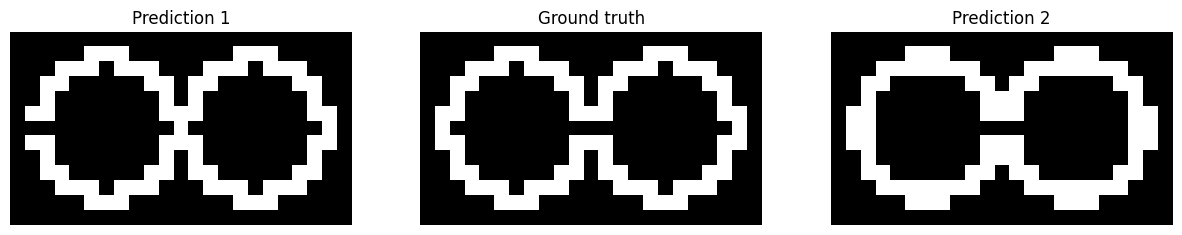

In [7]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 3, 1)
plt.title('Prediction 1')
plt.imshow(p1, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 2)
plt.title('Ground truth')
plt.imshow(gt, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 3, 3)
plt.title('Prediction 2')
plt.imshow(p2, cmap='gray')
plt.axis('off')
print(fig)

The network structure of Prediction 1 is different to the one described by the ground truth, whereas Prediction 2 represents the structure accurately. Pixel-wise metrics still favor Prediction 1:

In [8]:
print('Dice score:')
print('Prediction 1: %.3f' % Dice(p1, gt))
print('Prediction 2: %.3f' % Dice(p2, gt))
print()
print('Accuracy:')
print('Prediction 1: %.3f' % Accuracy(p1, gt))
print('Prediction 2: %.3f' % Accuracy(p2, gt))


Dice score:
Prediction 1: 0.987
Prediction 2: 0.950

Accuracy:
Prediction 1: 0.993
Prediction 2: 0.973


Here, also the Betti number error fails to detect the mistake:

In [9]:
print('Betti number error:')
print('Prediction 1:', BettiMatching(p1, gt, filtration='superlevel').Betti_number_error())
print('Prediction 2:', BettiMatching(p2, gt, filtration='superlevel').Betti_number_error())

Betti number error:
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
Prediction 1: 0
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
Prediction 2: 0


The Betti matching error does not only compare the number of features in the respective images, but also takes their spatial correspondance into account and favors Prediction 2:

In [10]:
BM1 = BettiMatching(p1,gt, filtration='superlevel')
BM2 = BettiMatching(p2,gt, filtration='superlevel')
print(BM1.loss())
print(BM2.loss())

num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
num edges: 562
num cubes: 1125
compute dim 0
birth uf is false
2.0
0.0


Here is another example from the SynMNIST dataset:

In [11]:
im = imageio.imread('./introduction_example/introduction-img.png')
gt = imageio.imread('./introduction_example/introduction_2-gt.png')
p1 = imageio.imread('./introduction_example/introduction_2-pred1.png')
p2 = imageio.imread('./introduction_example/introduction_2-pred2.png')


gt = gt/np.max(gt)
p1 = p1/np.max(p1)
p2 = p2/np.max(p2)

C:\Users\stefk\AppData\Local\Temp\ipykernel_23052\1186000599.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('./introduction_example/introduction-img.png')
C:\Users\stefk\AppData\Local\Temp\ipykernel_23052\1186000599.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  gt = imageio.imread('./introduction_example/introduction_2-gt.png')
C:\Users\stefk\AppData\Local\Temp\ipykernel_23052\1186000599.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warni

Figure(1500x500)


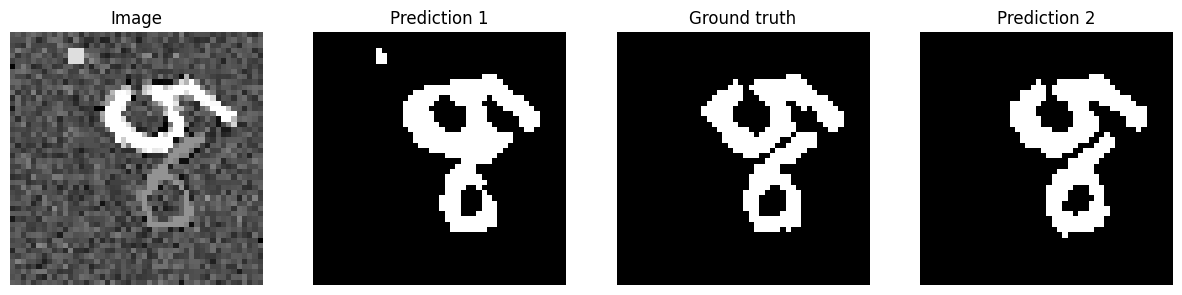

In [12]:
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1, 4, 1)
plt.title('Image')
plt.imshow(im, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 4, 2)
plt.title('Prediction 1')
plt.imshow(p1, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 4, 3)
plt.title('Ground truth')
plt.imshow(gt, cmap='gray')
plt.axis('off')
fig.add_subplot(1, 4, 4)
plt.title('Prediction 2')
plt.imshow(p2, cmap='gray')
plt.axis('off')
print(fig)

Prediction 1 is predicted by a model trained with the Wasserstein loss and Prediction 2 is predicted by a model trained with the Betti matching loss.

In [13]:
print('Dice score:')
print('Prediction 1: %.3f' % Dice(p1, gt))
print('Prediction 2: %.3f' % Dice(p2, gt))
print()
print('Accuracy:')
print('Prediction 1: %.3f' % Accuracy(p1, gt))
print('Prediction 2: %.3f' % Accuracy(p2, gt))
print()
BM1 = BettiMatching(p1,gt, filtration='superlevel')
BM2 = BettiMatching(p2,gt, filtration='superlevel')
print('Betti number error:')
print('Prediction 1:', BM1.Betti_number_error())
print('Prediction 2:', BM2.Betti_number_error())
print()

print('Betti matching error:')
print('Prediction 1:', BM1.loss())
print('Prediction 2:', BM2.loss())

Dice score:
Prediction 1: 0.922
Prediction 2: 0.918

Accuracy:
Prediction 1: 0.978
Prediction 2: 0.977

num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
num edges: 4512
num cubes: 9025
compute dim 0
birth uf is false
Betti number error:
Prediction 1: 0
Prediction 2: 0

Betti matching error:
Prediction 1: 4.0
Prediction 2: 0.0


Betti matching can be seen as a differentiable refinement of the Betti number error, which therefore can be used as a loss function to improve the topological performance of segmentation networks.

## 2.) How to use Betti matching

Examplary images representing a likelihood map (lh) and a ground truth segmentation (gt):

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

def frame(frame_nr, path):
    gif = Image.open(os.path.join(os.getcwd(), path))
    gif.seek(frame_nr)
    frame = np.array(gif)


# plt.imshow(frame, cmap='gray')

    frame = frame[:,:,0]

    classes = []
    num_classes = 4
    padding = 10

    x_coord = padding
    y_coord = padding
    image_size = 154
    for i in range(num_classes):
        classes.append(frame[y_coord:y_coord+image_size, x_coord:x_coord+image_size])
        x_coord = x_coord + image_size + padding

    return classes

# for image in classes:
#     print(f"image shape: {image.shape}")
#     plt.imshow(image, cmap='gray')

#     quit()




In [15]:
lh = np.array([[0.89,0.85,0.79,0.15,0.11,0.05,0.09],
               [0.81,0.05,0.91,0.09,0.03,0.21,0.13],
               [0.95,0.89,0.94,0.02,0.18,0.12,0.23],
               [0.19,0.12,0.05,0.14,0.08,0.22,0.16],
               [0.25,0.01,0.12,0.23,0.98,0.92,0.81],
               [0.11,0.04,0.09,0.14,0.91,0.04,0.79],
               [0.05,0.16,0.23,0.17,0.81,0.83,0.99]])

gt = np.array([[   1,   1,   1,   0,   0,   0,   0],
               [   1,   0,   1,   0,   0,   0,   0],
               [   1,   1,   1,   0,   0,   0,   0],
               [   0,   0,   0,   0,   0,   0,   0],
               [   0,   0,   0,   0,   1,   1,   1],
               [   0,   0,   0,   0,   1,   0,   1],
               [   0,   0,   0,   0,   1,   1,   1]])


lh = np.array([[0.8, 0.6, 0.49],[0.5, 0.1, 0.8], [0.7, 0.4, 0.9]])


## CubicalPersistence class

It computes the barcode of an image.

input:
- Picture = Image (numpy array / torch tensor)

- relative = True / False:
    
    'True' adds a boundary to the image to increase topological complexity

- reduced = True / False: 
    
    'True' computes reduced homology (ignores the essential interval in dimension $0$)

- filtration = 'sublevel' / 'superlevel': 

    uses sublevel / superlevel filtration

- construction = 'V' / 'T': 

    uses V- / T- construction to generate the cubical complex

num edges: 12
num cubes: 25
[tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.9000, dtype=torch.float64), tensor(0.

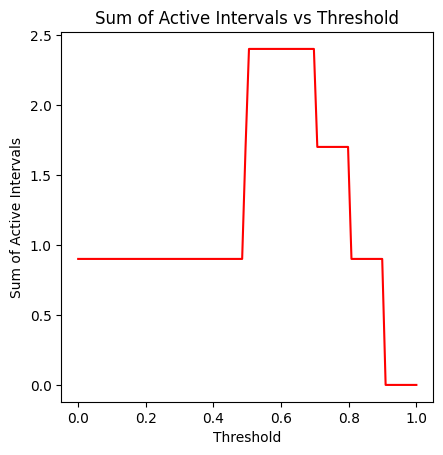

[tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0., dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), tensor(0.4000, dtype=torch.float64), ten

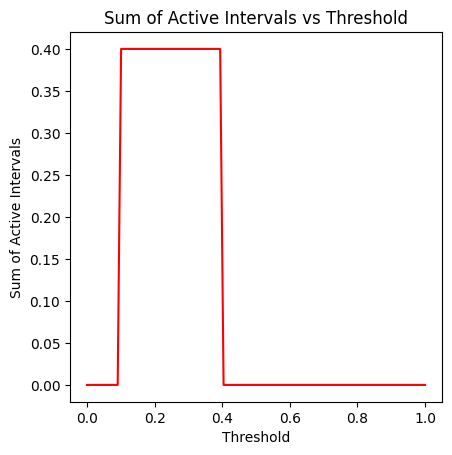

In [61]:
CLASS_INDEX = 3
classes = frame(18, '../../results/gif_over_timesteps_7.gif')
segmentation = torch.from_numpy(classes[CLASS_INDEX] / 256)
CP = CubicalPersistence(lh, relative=False, reduced=False, filtration='superlevel', construction='V', birth_UF=True)

CP.plot_sum_active_intervals(dim=0, points=100)
CP.plot_sum_active_intervals(dim=1, points=100)

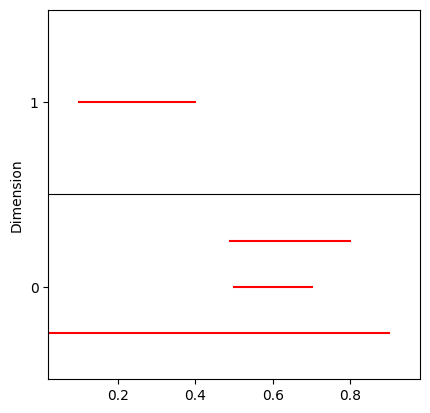

In [17]:
CP.BarCode()

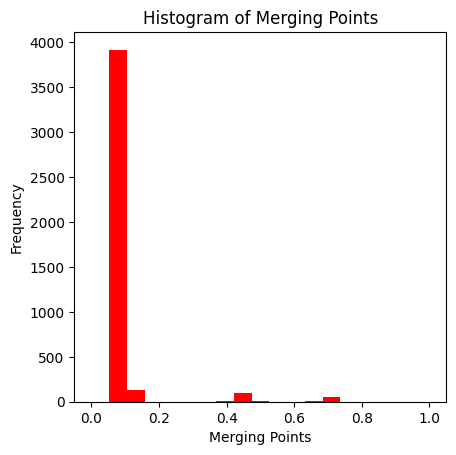

In [49]:
CP.plot_merging_points(dim=0, interval_to_merge=0, num_bins=20)

In [19]:
CP.get_non_merging_intervals(0, 0, num_gaps=10)

gap: 0.010000000000000009 ranging from 0.49 to 0.5


In [20]:
sums, ranges = CP.merging_point_bins(0, 0, 20)

print(ranges)

merged = [(sums[i], (ranges[i], ranges[i+1])) for i in range(sums.shape[0])]
def sorting_fn(x):
    return x[0]

print(sums)
valleys = [sums[i-1] > sums[i] and sums[i+1] > sums[i] for i in range(1, sums.shape[0] - 1)]
valleys.insert(0, False)
valleys.append(False)
print(valleys)
print(f"valleys length: {len(valleys)}")

candidates = [merged[i] for i in range(len(valleys)) if valleys[i]]

print(f"candidates: {candidates}")
print(f"sorted candidates: {sorted(candidates, key=sorting_fn)}")

merged_sorted = sorted(merged, key=sorting_fn)

print(merged_sorted)


num bins: 20
[0.49  0.495 0.5  ]
[1 1]
[False, False]
valleys length: 2
candidates: []
sorted candidates: []
[(1, (0.49, 0.495)), (1, (0.495, 0.5))]


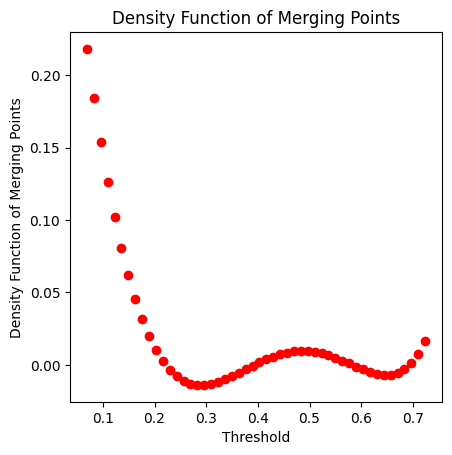

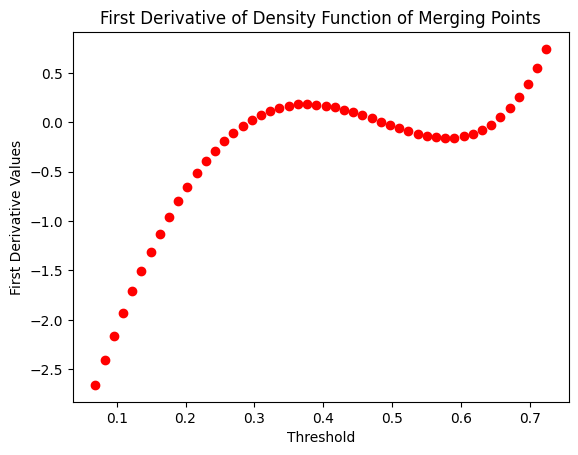

array([0.64803828, 0.28976923])

In [21]:
CP.merging_points_analysis(dim=0, interval_to_merge=0, num_bins=50, degree=5, plot=True)

x: 2 for 2
x: 2 for 5
x: 2 for 7
x: 0 for 1
x: 2 for 4
x: 0 for 0


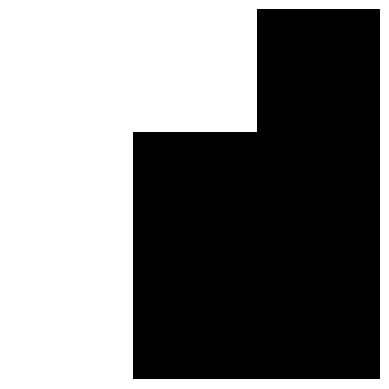

In [43]:
CP.plot_component_at_threshold(dim=0, threshold=0.5, component_idx=2)

In [50]:
interval = CP.important_components(dim=0, num_intervals=1)[0]
print(interval)
comp_map = CP.component_map(0.6, 0, 0.1)


print(f"_map: {comp_map}")

(0, inf)
pixel_index map: tensor([[26995, 17981, 26994,  ..., 54517, 54516, 39633],
        [26972, 26971, 39632,  ..., 17939, 12037, 39611],
        [39610,  6230, 39609,  ..., 80511, 26916,  8444],
        ...,
        [ 9532, 14843,  6730,  ..., 86912, 14817, 23522],
        [ 9515, 52076, 67420,  ...,  9498, 23498, 79636],
        [14803, 23497,  9497,  ..., 36461, 36460, 67389]], dtype=torch.int32)
_map: tensor([[0.0938, 0.0977, 0.0938,  ..., 0.0859, 0.0859, 0.0898],
        [0.0938, 0.0938, 0.0898,  ..., 0.0977, 0.1016, 0.0898],
        [0.0898, 0.1094, 0.0898,  ..., 0.0781, 0.0938, 0.1055],
        ...,
        [0.1016, 0.0977, 0.1055,  ..., 0.0742, 0.0977, 0.0938],
        [0.1016, 0.0859, 0.0820,  ..., 0.1016, 0.0938, 0.0781],
        [0.0977, 0.0938, 0.1016,  ..., 0.0898, 0.0898, 0.0820]],
       dtype=torch.float64)


shape comp map: torch.Size([154, 154])


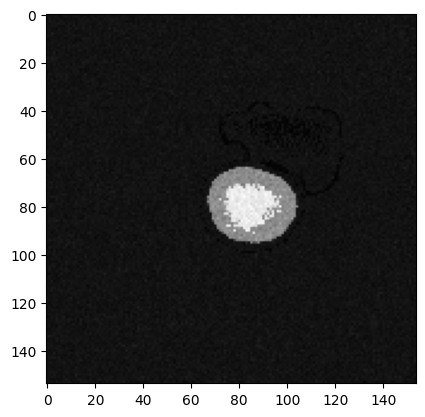

In [51]:
import matplotlib.pyplot as plt

print(f"shape comp map: {comp_map.shape}")
plt.imshow(comp_map, cmap='gray')


In [221]:
CP.threshold_analysis_dim0_components(2, 20, 5, 0.2)

num components: 2
num bins: 20
thresholds: [-0.35704008+0.j]
type threshold candidates: <class 'numpy.ndarray'>
type death value: <class 'float'>
type birth value: <class 'float'>
num bins: 20
thresholds: []
type threshold candidates: <class 'numpy.ndarray'>
type death value: <class 'numpy.float64'>
type birth value: <class 'float'>


c:\Users\stefk\OneDrive\Dokumente\Informatik\MT\master_thesis\src\betti\BettiMatching.py:827: RankWarning: Polyfit may be poorly conditioned
  params:


[((0, inf), -inf), ((2, 12), 0.49)]

### Test PseudoGTGenerator

First import the necessary classes and functions:

In [60]:
from guidance.pgt import PseudoGTGeneratorBase

ModuleNotFoundError: No module named 'src'

### IndexMap
The IndexMap inside the CubicalPersistence class describes the indices of the cells in the cubical complex obtained from the image:

In [30]:
CP.IndexMap

array([[ 2,  6,  5, 12, 10],
       [ 9, 24, 20, 23, 11],
       [ 7, 19, 16, 17,  1],
       [ 8, 22, 18, 21,  3],
       [ 4, 15, 13, 14,  0]])

In [31]:
CP.uf_0.get_parent(4)

2

In [32]:
CP.uf_0.get_component(7)

[0, 1, 2, 4, 5, 7, 10, 13, 16]

In [33]:
CP.uf_0.get_birth(16)

0

In [34]:
CP.uf_0.rank

[1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
CP.ValueMap

array([[0.8 , 0.6 , 0.6 , 0.49, 0.49],
       [0.5 , 0.1 , 0.1 , 0.1 , 0.49],
       [0.5 , 0.1 , 0.1 , 0.1 , 0.8 ],
       [0.5 , 0.1 , 0.1 , 0.1 , 0.8 ],
       [0.7 , 0.4 , 0.4 , 0.4 , 0.9 ]])

In [68]:
CP.uf_0.find_assigned_comp_at_thr(1, 0.2)

0

### CupbicalPersistence allows to:

- plot the image:

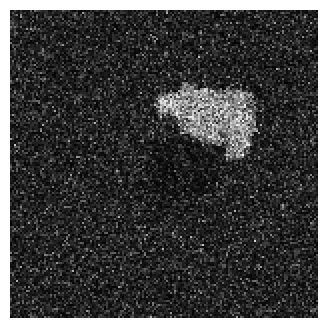

In [73]:
CP.plot_image()

- get the persistent intervals:

    input:
    - refined = True / False: 
    
        True outputs refined persistent intervals 

    output: 
    - list of length 2: 
    
        $[\text{list of intervals in dimension }0, \text{list of intervals in dimension }1]$

In [58]:
CP.important_components(dim=0, num_intervals=3, refined=True)


[(0, inf), (83, 1451), (82, 1377)]

- get the Betti numbers:

    input:
    - threshold = $t \in \mathbb{R}$: 
    
        compute the Betti numbers of the cubical complex consisting of all cells with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    output:
    - list of length 2: 
    
        $[0\text{th Betti number}, 1\text{st Betti number}]$

In [15]:
CP.get_Betti_numbers(threshold=0.5)

[2, 0]

- plot the persistence barcode of the image:

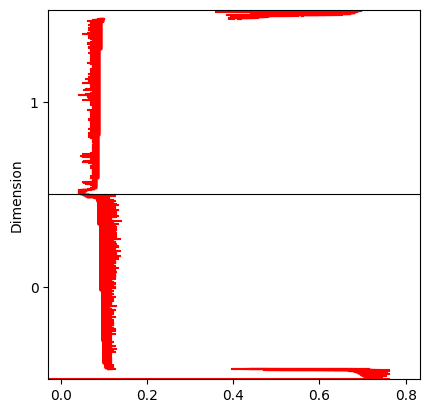

In [82]:
CP.BarCode()

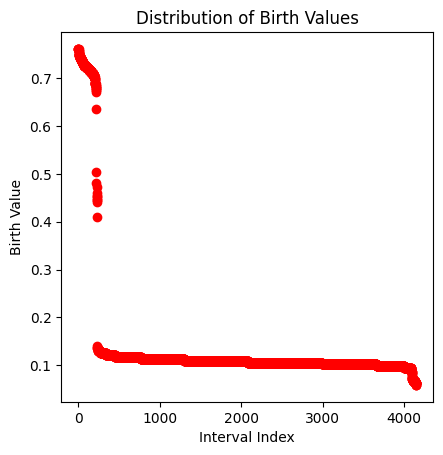

In [85]:
CP.plot_birth_values(0)

- plot the representative cycles of intervals inside the image:

    input:
    - dim = $d$ $\in \{0,1\}$: 
    
        plot representative cycles of intervals in dimension $d$

    - intervals = $n \in \{1,...,6\}$ / $[n_1,...,n_k]$ (list of nonnegative integers of length at most 6): 
    
        plots the representative cycles of $n$ random intervals / the intervals $n_1,...,n_k$

    - threshold = $t \in \mathbb{R}$: 
    
        plots the pixels of representative cycles with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    - plot_birth_and_death = True / False: 
    
        True marks the critical pixels that create and kill the interval (birth: green star, death: red cross)


enumerated intervals: [(0, (0.4, 0.1))]
enumerated intervals: [(0, (0.4, 0.1))]
edge: 15
get component for 23
cycle length: 8
birth dict: {24: 1}
non zero elements in CycleMap: 8
non zero elements in CycleMap_masked: 8


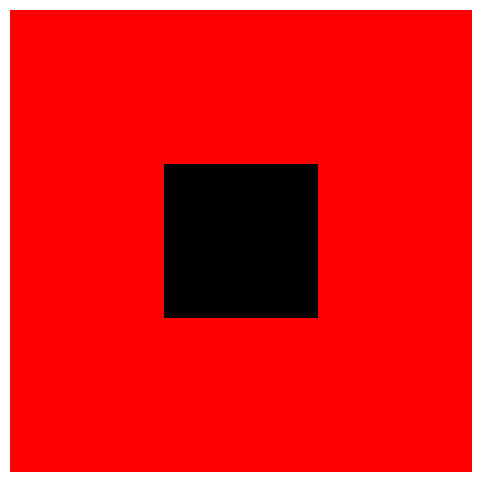

In [80]:
CP.plot_representative_cycles(dim=1, intervals=2, threshold=0.4, plot_birth_and_death=False)

In [70]:
CP.PixelMap

array([[0.8, 0.6, 0.5],
       [0.5, 0.1, 0.8],
       [0.7, 0.4, 0.9]])

In [18]:
CP.plot_representative_cycles(dim=0, intervals=[1,3], threshold=0.5, plot_birth_and_death=True)

IndexError: list index out of range

- produce an interactive plot of the representative cycles of intervals inside the image:
    
    input:
    - dim = $d \in \{0,1\}$: 
    
        plot representative cycles in dimension $d$

    - plot_birth_and_death = True / False: 
    
        True marks the critical pixels that create and kill the interval (birth: green star, death: red cross)

    The slider "interval" allows to choose a interval and see its corresponding representative cycle.

    The slider "threshold" allows to adapt the threshold value $t$, so that pixels with a value $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration) are ploted.

    Cycles are colored in green if the interval represented by the cycle contains the threshold $t$. In other words: The cycle is green if it is alive and red if it is dead at threshold $t$.

In [19]:
CP.plot_representative_cycles_app(dim=0, plot_birth_and_death=False)

a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 2
non zero elements in CycleMap_masked: 2


BokehModel(combine_events=True, render_bundle={'docs_json': {'18e2ef64-299c-45f4-9702-514008a60669': {'defs': …

a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 2
non zero elements in CycleMap_masked: 2
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: {0: 1}
non zero elements in CycleMap: 7
non zero elements in CycleMap_masked: 7
a: 0.9, b: -inf
birth dict: 

In [121]:
CP.plot_representative_cycles_app(dim=1, plot_birth_and_death=False)

enumerated intervals: [(0, (0.4, 0.1))]
enumerated intervals: [(0, (0.4, 0.1))]
edge: 15
cycle length: 8
birth dict: {24: 1}
non zero elements in CycleMap: 8
non zero elements in CycleMap_masked: 8


BokehModel(combine_events=True, render_bundle={'docs_json': {'5bb548a4-f80c-4aed-b99f-f9dcbf4029dc': {'defs': …

In [67]:
test = np.array([
    [0.8, 0.9, 0, 0],
    [0.3, 0, 0, 1.0],
    [0,0,0, 0],
    [0.93, 0.88, 0, 0.4]
])

print(f"shape test: {test.shape}")

test = torch.from_numpy(test)

maxis_value, maxis_indices = torch.max(test,dim=1)

print(f"max vlaues {maxis_value}")
print(f"max indices {maxis_indices}")


CP_test = CubicalPersistence(test, relative=False, reduced=False, filtration='superlevel', construction='V', )

shape test: (4, 4)
shape test: (1, 4)
max vlaues tensor([0.9000, 1.0000, 0.0000, 0.9300], dtype=torch.float64)
max indices tensor([1, 3, 0, 0])
num edges: 24
num cubes: 49
compute dim 0
birth uf is false


## Sharpening Functions

In [175]:
def sharpening(x_softmax: torch.Tensor, alpha: float=1.0):
    """
        Sharpening of the softmax output. 
        params:
            x_softmax: torch.Tensor, shape (num_classes, height, width)
            alpha: float, >= 1
        returns:
            torch.Tensor, shape (num_classes, height, width)
    """
    x_softmax = x_softmax.pow(alpha)
    print(f"x_softmax before normalization: {x_softmax}")

    return x_softmax / torch.sum(x_softmax, dim=0)


def temperature_scaling(x_softmax: torch.Tensor, temperature: float=0.2):
    """
        Temperature scaling of the softmax output. 
        params:
            x_softmax: torch.Tensor, shape (num_classes, height, width)
            temperature: float
        returns:
            torch.Tensor, shape (num_classes, height, width)
    """
    print(f"x_softmax before normalization temp: {x_softmax / temperature}")

    return torch.softmax(x_softmax / temperature, dim=0)


def smoothing_test(x_softmax: torch.Tensor, likelyhood: torch.Tensor, alpha: float=0.5):
    x_softmax = alpha * x_softmax + (1- alpha) * x_softmax * likelyhood
    return x_softmax / torch.sum(x_softmax, dim=0)


def smoothing_test2(x_softmax: torch.Tensor, likelyhood: torch.Tensor, scale: float=1):
    x_softmax = x_softmax * likelyhood * scale
    sum = torch.sum(x_softmax, dim=0)
    print(f"shape sum {sum.shape}")
    return x_softmax / sum


def likelyhood_scaling(x_softmax: torch.Tensor, likelyhood: torch.Tensor, scale: float=1, sum=False):
    x_softmax = x_softmax / (1-likelyhood) * scale
    if sum:
        return x_softmax / torch.sum(x_softmax, dim=0)
    return torch.softmax(x_softmax, dim=0)


def likelyhood_temperature_scaling(x_softmax: torch.Tensor, likelyhood: torch.Tensor, alpha: float=1.0, beta: float=0.0):
    x_softmax = x_softmax / (1-likelyhood) * alpha + torch.softmax(x_softmax, dim=0) * beta

    return x_softmax / torch.sum(x_softmax, dim=0)



In [101]:
random_tensor = torch.randn((3,3,3))

In [183]:
likelyhood = torch.full((3,3,3), 0.1)
likelyhood[0][0][2] = 0.1
likelyhood[1][0][2] = 0.1
softmax = torch.softmax(random_tensor, dim=0)

print(f"original tensor: {softmax}")
# print(f"new tensor: {smoothing_test(softmax, likelyhood, alpha=0.2)}")
print(f"new tensor: {likelyhood_temperature_scaling(softmax, likelyhood, alpha=0.1, beta=0.9)}")

# print(f"new tensor: {smoothing_test2(softmax, likelyhood, scale=1)}")


original tensor: tensor([[[0.6566, 0.5403, 0.4340],
         [0.5062, 0.6756, 0.4268],
         [0.2402, 0.4993, 0.0563]],

        [[0.1754, 0.1745, 0.4717],
         [0.1644, 0.0653, 0.2835],
         [0.1967, 0.1659, 0.8818]],

        [[0.1680, 0.2853, 0.0943],
         [0.3294, 0.2591, 0.2897],
         [0.5631, 0.3348, 0.0618]]])
new tensor: tensor([[[0.4710, 0.4199, 0.3713],
         [0.4049, 0.4784, 0.3719],
         [0.2930, 0.4019, 0.2137]],

        [[0.2658, 0.2693, 0.3879],
         [0.2662, 0.2267, 0.3128],
         [0.2769, 0.2669, 0.5708]],

        [[0.2632, 0.3108, 0.2408],
         [0.3289, 0.2949, 0.3153],
         [0.4301, 0.3312, 0.2155]]])


In [78]:

import torch

torch.set_printoptions(sci_mode=False)

random_tensor = torch.randn((3,3,3))
alpha = 0.5

softmax = torch.nn.functional.softmax(random_tensor, dim=0)

max_values, max_indices = torch.max(softmax, dim=0)
# print(f"max_values: {max_values}")
# print(f"max_indices: {max_indices}")

max_values_one_hot = alpha * torch.zeros_like(softmax).scatter_(0, max_indices.unsqueeze(0), max_values.unsqueeze(0))


# print(f"max value shape: {max_values_one_hot.shape}")
# print(f"max values one hot: {max_values_one_hot}")

# new_softmax = softmax - max_values_one_hot + (torch.sum(max_values_one_hot, dim=0)/softmax.shape[0]).unsqueeze(0)

# print(f"new_softmax {new_softmax}")
# print(f"shape new softamx {new_softmax.shape}")

# print(f"test new_softmax: {torch.sum(new_softmax, dim=0)}")

new_softmax = sharpening(softmax, 2)
temp_softmax = temperature_scaling(softmax, 0.2)

print(f"original {softmax}")
# print(f"sharpening: {new_softmax}")
print(f"temperatur: {temp_softmax}")
print(f"softmax softmax: {new_softmax}")




x_softmax before normalization: tensor([[[0.0010, 0.0481, 0.3417],
         [0.0266, 0.0047, 0.3053],
         [0.1564, 0.0286, 0.0064]],

        [[0.7188, 0.0355, 0.0704],
         [0.1253, 0.4443, 0.0713],
         [0.2185, 0.0215, 0.1199]],

        [[0.0145, 0.3508, 0.0225],
         [0.2334, 0.0702, 0.0326],
         [0.0188, 0.4683, 0.3293]]])
x_softmax before normalization temp: tensor([[[0.1580, 1.0969, 2.9228],
         [0.8148, 0.3425, 2.7628],
         [1.9771, 0.8458, 0.3992]],

        [[4.2392, 0.9416, 1.3268],
         [1.7696, 3.3329, 1.3348],
         [2.3373, 0.7327, 1.7316]],

        [[0.6028, 2.9615, 0.7504],
         [2.4156, 1.3247, 0.9025],
         [0.6856, 3.4215, 2.8691]]])
original tensor([[[0.0316, 0.2194, 0.5846],
         [0.1630, 0.0685, 0.5526],
         [0.3954, 0.1692, 0.0798]],

        [[0.8478, 0.1883, 0.2654],
         [0.3539, 0.6666, 0.2670],
         [0.4675, 0.1465, 0.3463]],

        [[0.1206, 0.5923, 0.1501],
         [0.4831, 0.2649, 0.180

In [122]:
t = torch.Tensor([0.465, 0.1, 0.0])
print(torch.softmax(t, dim=0))

tensor([0.4306, 0.2989, 0.2705])


In [36]:
CP_test.get_intervals(refined=False)

[[(1.0, -inf), (0.4, 0.0), (0.93, 0.0), (0.9, 0.0)], []]

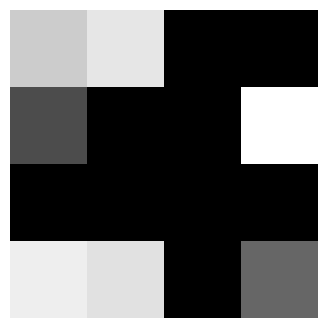

In [37]:
CP_test.plot_image()

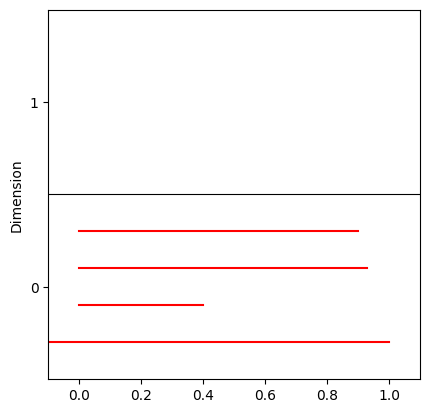

In [38]:
CP_test.BarCode()

CycleMap: [[1. 1. 0. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 3.]]


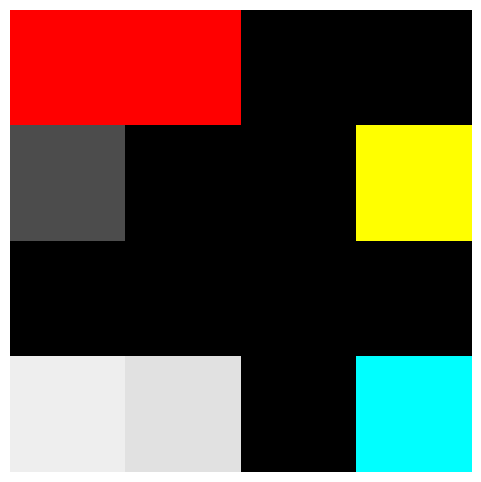

In [55]:
CP_test.plot_representative_cycles(dim=0, intervals=3, threshold=0.7)

In [50]:
CP_test.PixelMap

array([[0.8 , 0.9 , 0.  , 0.  ],
       [0.3 , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  ],
       [0.93, 0.88, 0.  , 0.4 ]])

## PseudoGTGenerator Test

## BettiMatching class

It computes the Betti matching between two images.

input:
- Picture_0 = Image_0 (numpy array / torch tensor)

- Picture_1 = Image_1 (numpy array / torch tensor of same shape as Image_0)

- relative = True / False: 

    'True' adds a boundary to the image to increase topological complexity

- reduced = True / False: 

    'True' computes reduced homology (ignores the essential interval in dimension 0)

- filtration = 'sublevel' / 'superlevel': 

    uses the sublevel / superlevel filtration

- construction = 'V' / 'T': 

    uses the V- / T- construction to generate the cubical complex

- comparison = 'union' / 'intersection':

    uses the union / intersection as comparison image

In [ ]:
BM = BettiMatching(lh,gt, relative=False, reduced=False, filtration='superlevel', construction='V', comparison='union')

### BettiMatching allows to:
- plot the images:

    input:
    
    - plot_comparison = True / False:

        True additionally plots the comparison image

In [ ]:
BM.plot_images(plot_comparison=True)

- get the Betti matching:

    input:
    - refined = True / False:

        True outputs refined persistent intervals

    output:
    - list of length 2:
        
        $[\text{list of matched intervals in dimension }0,\text{list of matched intervals in dimension }1]$

        Matched intervals are given as tripels $(\text{interval of Image\_}0,\text{interval of comparison image},\text{interval of Image\_}1)$.
        
    - list of length 2:

        $[\text{list of unmatched intervals of Image\_}0\text{ in dimension }0,\text{list of unmatched intervals of Image\_}0\text{ in dimension 1}]$

    - list of length 2

        $[\text{list of unmatched intervals of Image\_}1\text{ in dimension }0,\text{list of unmatched intervals of Image\_}1\text{ in dimension 1}]$

In [ ]:
BM.get_matching()

- get the Betti matching loss:

    input:
    - dimensions = $[0]$ / $[1]$ / $[0,1]$:

        computes the Betti matching loss in dimension $0$ / $1$ / the sum of both

    output:
    - $l_\text{BM}(\text{Image\_}0,\text{Image\_}1)$

In [ ]:
print(BM.loss(dimensions=[0]))
print(BM.loss(dimensions=[1]))
print(BM.loss(dimensions=[0,1]))

- get the Betti number error:

    input:
    - threshold = $t \in \mathbb{R}$:

        compute the Betti number error of the cubical complexes consisting of all cells with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    - dimensions = $[0]$ / $[1]$ / $[0,1]$:

        computes the Betti number error in dimension $0$ / $1$ / the sum of both

    output:
    - $\beta^\text{err}(\text{Image\_}0,\text{Image\_}1)$

In [ ]:
print(BM.Betti_number_error(threshold=0.5, dimensions=[0]))
print(BM.Betti_number_error(threshold=0.5, dimensions=[1]))
print(BM.Betti_number_error(threshold=0.5, dimensions=[0,1]))

- plot the persistence barcodes of the images:
    
    input:
    - plot_comparison = True / False:

        True additionally plots the barcode of the comparison image

    Intervals of Image_0 are colored red, intervals of Image_1 are colored blue and intervals of the comparison image are colored in green.

    A red interval is matched to a blue interval if there is a green interval in between.

In [ ]:
BM.BarCode(plot_comparison=True)

- plot the representative cycles of matched intervals inside the images:

    input:
    - dim = $d$ $\in \{0,1\}$: 
    
        plot representative cycles of matches in dimension $d$

    - matches = $n \in \{1,...,6\}$ / $[n_1,...,n_k]$ (list of nonnegative integers of length at most 6): 
    
        plots the representative cycles of $n$ random matches / the matches $n_1,...,n_k$

    - threshold_0 = $t \in \mathbb{R}$: 
    
        plots the pixels of representative cycle of Image_0 with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    - threshold_comp = $t \in \mathbb{R}$: 
    
        plots the pixels of representative cycle of the comparison image with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    - threshold_1 = $t \in \mathbb{R}$: 
    
        plots the pixels of representative cycle of Image_1 with values $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration)

    - plot_birth_and_death = True / False: 
    
        True marks the critical pixels that create and kill the interval (birth: green star, death: red cross)

    - plot_comparison = True / False:

        True additionally plots the comparison image

In [ ]:
BM.plot_representative_cycles(dim=0, matches=4, threshold_0=0.5, threshold_comp=0.5, threshold_1=0.5, plot_birth_and_death=True, plot_comparison=False)

In [ ]:
BM.plot_representative_cycles(dim=1, matches=[1], threshold_0=0.5, threshold_comp=0.5, threshold_1=0.5, plot_birth_and_death=False, plot_comparison=True)

- produce an interactive plot of the representative cycles of matched intervals inside the image:
    
    input:
    - dim = $d \in \{0,1\}$: 
    
        plot representative cycles in dimension $d$

    - plot_birth_and_death = True / False: 
    
        True marks the critical pixels that create and kill the interval (birth: green star, death: red cross)

    - plot_comparison = True / False:

        True additionally plots the comparison image

    The slider "match" allows to choose a match and see its corresponding representative cycles.

    The sliders "threshold_0", "threshold_comp" and "threshold_1" allow to adapt the threshold value $t$, so that pixels with a value $\leq t$ (sublevel filtration) / $\geq t$ (superlevel filtration) are ploted.

    Cycles are colored in green if the interval represented by the cycle contains the threshold $t$. In other words: The cycle is green if it is alive and red if it is dead at threshold $t$.

In [ ]:
BM.plot_representative_cycles_app(dim=0, plot_birth_and_death=False, plot_comparison=True)

In [ ]:
BM.plot_representative_cycles_app(dim=1, plot_birth_and_death=True, plot_comparison=False)

## 3.) Improvements of Betti matching over Wasserstein Matching during training

In [ ]:
lh = np.array([[0.01,0.12,0.07,0.08,0.04,0.21,0.15,0.12,0.08],
               [0.05,0.99,0.85,0.79,0.15,0.11,0.05,0.09,0.13],
               [0.14,0.81,0.05,0.91,0.09,0.03,0.21,0.13,0.17],
               [0.19,0.95,0.89,0.94,0.02,0.18,0.12,0.23,0.07],
               [0.25,0.19,0.12,0.05,0.14,0.08,0.22,0.13,0.03],
               [0.23,0.25,0.01,0.12,0.23,0.98,0.92,0.81,0.09],
               [0.13,0.11,0.04,0.09,0.14,0.91,0.04,0.83,0.13],
               [0.06,0.05,0.16,0.23,0.17,0.81,0.79,0.89,0.05],
               [0.03,0.05,0.12,0.16,0.23,0.17,0.06,0.14,0.03]])

gt = np.array([[   0,   0,   0,   0,   0,   0,   0,   0,  0],
               [   0,   1,   1,   1,   0,   0,   0,   0,  0],
               [   0,   1,   0,   1,   0,   0,   0,   0,  0],
               [   0,   1,   1,   1,   0,   0,   0,   0,  0],
               [   0,   0,   0,   0,   0,   0,   0,   0,  0],
               [   0,   0,   0,   0,   0,   1,   1,   1,  0],
               [   0,   0,   0,   0,   0,   1,   0,   0,  0],
               [   0,   0,   0,   0,   0,   1,   0,   0,  0],
               [   0,   0,   0,   0,   0,   0,   0,   0,  0]])

In [ ]:
BM = BettiMatching(lh,gt, filtration='superlevel')
WM = WassersteinMatching(lh, gt, filtration='superlevel')

A segmentation with a significant topological error on the bottom right of the image:

In [ ]:
BM.plot_images()

Let $L$ denote the likelihood map and $G$ the ground truth segmentation.

The two obvious cycles in $L$ are represented by points in the persistence diagrams $\text{Dgm}(L)$.

In [ ]:
BM.CP_0.plot_representative_cycles(intervals=[2,3], plot_birth_and_death=True)

Let $x=(x_1,x_2) \in \text{Dgm}(L)$ be the point corresponding to the red cycle and $y=(y_1,y_2) \in \text{Dgm}(L)$ the point corresponding to the blue cycle.

Then $x_1,y_1$ are defined by the value of the pixel marked with a red cross inside the respective cycle and $x_2,y_2$ are defined by the value of the pixel marked with a green star on the respective cycle.

In [ ]:
BM.plot_representative_cycles()

The Betti matching $\mu(L,G)$ correctly matches the top-left cycle in $L$ with the top-left cycle in $G$ (represented by $(0,1) \in \text{Dgm}(G)$) and leaves the bottom-right cycle in $L$ unmatched.

Hence, it maps the point $x$ to $(0,1)$ and $y$ to its closest point $(\frac{y_1+y_2}{2},\frac{y_1+y_2}{2})$ on the diagonal $\Delta := \{(x,x) \mid x \in \mathbb{R}\}$.

Therefore, the gradient of the Betti matching loss 

$l_{\text{BM}}(L,G) = \sum_{q \in \text{Dgm}(L)} 2\Vert q - \mu(L,G)(q) \Vert_2^2 = \sum_{q \in \text{Dgm}(L)} 2(q_1-\mu(L,G)(q)_1)^2 + 2(q_2-\mu(L,G)(q)_2)^2$

enforces the segmentation network to 
- move the point $x$ closer to $(0,1)$;
- move the point $y$ closer to $(\frac{y_1+y_2}{2},\frac{y_1+y_2}{2})$;

to reduce the total loss.

This can only be achieved by
- decreasing $x_1$ and increasing $x_2$;
- increasing $y_1$ and decreasing $y_2$.

Considering again which pixel-values determine the points $x$ and $y$, we observe that this will
- increase the local contrast of the top-left cycle in $L$;
- decrease the local contrast of the bottom-right cycle in $G$.

This leads to a topological improvement of the segmentation since the ground truth states that the top-left cycle should exist and the bottom-right cycle should not.

In [ ]:
WM.plot_representative_cycles()

In contrast, the Wasserstein matching matches the bottom-right cycle in $L$ with the top-left cycle in $G$ and leaves the top-left cycle in $L$ unmatched.

Following the same logic as before, the gradient of the Wasserstein loss enforces the segmentation network to
- increase the local contrast of the bottom-right cycle (since it is matched);
- reduce the contrast of the top-left cycle (since it is unmatched). 

This even amplifies the topological error of the segmentation.

## 4.) Betti matching error as refined Betti number error

In [ ]:
pr = np.array([[0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,0],
               [0,0,0,0,0,1,0,1,0],
               [0,0,0,0,0,1,1,1,0],
               [0,0,0,0,0,0,0,0,0],
               [0,1,1,1,0,0,0,0,0],
               [0,1,0,1,0,0,0,0,0],
               [0,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0]])

gt = np.array([[0,0,0,0,0,0,0,0,0],
               [0,1,1,1,0,0,0,0,0],
               [0,1,0,1,0,0,0,0,0],
               [0,1,1,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,1,1,0],
               [0,0,0,0,0,1,0,1,0],
               [0,0,0,0,0,1,1,1,0],
               [0,0,0,0,0,0,0,0,0]])

In [ ]:
BM = BettiMatching(pr, gt, filtration='superlevel')
WM = WassersteinMatching(pr, gt, filtration='superlevel')

A binarized prediction $P$ (left) which correctly predicts two cycles, but the location inside the image is completely off given the ground truth $G$ (right):

In [ ]:
BM.plot_images()

The Betti number error fails to detect the mistake, since it only compares the number of features in both images:

In [ ]:
BM.Betti_number_error(dimensions=[1])

Whereas the Betti matching error takes the spatial correspondance into account, by considering both images embeded into a comparison image, and therefore detects the mistake:

In [ ]:
BM.loss(dimensions=[1])

All four $1$-cycles in $P$ and $G$ are unmatched:

In [ ]:
BM.get_matching()

In [ ]:
BM.plot_representative_cycles()

They are all represented by $(0,1)$ in their persistent diagram and get mapped to $(\frac{1}{2},\frac{1}{2})$ under the Betti matching $\mu(P,G)$ since they are unmatched.

Hence they contribute with $(0-\frac{1}{2})^2+(1-\frac{1}{2})^2 = \frac{1}{2}$ to the Betti matching loss $L_{\text{TM}}(L,G) = \sum_{q \in \text{Dgm}(L)} \Vert q - \mu(L,G)(q) \Vert_2^2$.

The Wasserstein Matching randomly matches the features in dimension $1$:

In [ ]:
WM.plot_representative_cycles()

So its corresponding loss also fails to detect the mistake:

In [ ]:
WM.loss(dimensions=[1])

## 5.) Training examples

### Cremi

In [ ]:
# Choose image:
example = '0114'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/cremi/DiceTopoMatch_relative_True_bothlevel_alpha_0.005/last_model_DiceTopo0.005-bothlevel_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/CREMI'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:304,:304]
input = input.unsqueeze(0)[:,:,:304,:304]
seg = seg[:304,:304]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles()

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles()

In [ ]:
WM.plot_representative_cycles_app()

In [ ]:
# Choose image:
example = '0117'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/cremi/DiceTopoMatch_relative_True_bothlevel_alpha_0.005/last_model_DiceTopo0.005-bothlevel_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/CREMI'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:304,:304]
input = input.unsqueeze(0)[:,:,:304,:304]
seg = seg[:304,:304]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output_bin, seg, filtration='superlevel')
WM = WassersteinMatching(output_bin, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles()

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles()

In [ ]:
WM.plot_representative_cycles_app()

In [ ]:
# Choose image:
example = '0123'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/cremi/DiceTopoMatch_relative_True_bothlevel_alpha_0.005/last_model_DiceTopo0.005-bothlevel_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/CREMI'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:304,:304]
input = input.unsqueeze(0)[:,:,:304,:304]
seg = seg[:304,:304]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output_bin, seg, filtration='superlevel')
WM = WassersteinMatching(output_bin, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles()

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles()

In [ ]:
WM.plot_representative_cycles_app()

### Roads

In [ ]:
# Choose image:
example = '0111'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/roads/DiceTopoMatch_bothlevel_relative_True_alpha_0.5/last_model_dict.pth', in_channels=3, channels=[64,128,256,512,1024])

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/roads'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(matches=[1,2,3,4,5,6])

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles(matches=[1,2,3,4,6,7])

In [ ]:
WM.plot_representative_cycles_app()

In [ ]:
# Choose image:
example = '0113'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/roads/DiceTopoMatch_bothlevel_relative_True_alpha_0.5/last_model_dict.pth', in_channels=3, channels=[64,128,256,512,1024])

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/roads'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(matches=[3,4,5,6,7,8])

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles(matches=[2,3,4,5,6,7])

In [ ]:
WM.plot_representative_cycles_app()

In [ ]:
# Choose image:
example = '0122'

# Choose area of interest:
m_0, m_1 = (0,300)
n_0, n_1 = (0,300)

# Choose model:
model = load_model('models/roads/DiceTopoMatch_bothlevel_relative_True_alpha_0.5/last_model_dict.pth', in_channels=3, channels=[64,128,256,512,1024])

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/roads'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(matches=[1,4,6,11,12,15])

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles()

In [ ]:
WM.plot_representative_cycles_app()

### Buildings

In [ ]:
# Choose image:
example = '0090'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/buildings/DiceTopoMatch_bothlevel_relative_True_alpha_0.05/last_model_dict.pth', in_channels=3, channels=[64,128,256,512,1024])

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/buildings'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=0)

In [ ]:
BM.plot_representative_cycles_app(dim=0)

In [ ]:
WM.plot_representative_cycles(dim=0)

In [ ]:
WM.plot_representative_cycles_app(dim=0)

In [ ]:
# Choose image:
example = '0105'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/buildings/DiceTopoMatch_bothlevel_relative_True_alpha_0.05/last_model_dict.pth', in_channels=3, channels=[64,128,256,512,1024])

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/buildings'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=0)

In [ ]:
BM.plot_representative_cycles_app(dim=0)

In [ ]:
WM.plot_representative_cycles(dim=0)

In [ ]:
WM.plot_representative_cycles_app(dim=0)

### Elegans cells

In [ ]:
# Choose image:
example = '0090'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/elegans/DiceTopoMatch_bothlevel_relative_True_alpha_0.005/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/elegans_cells'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=0)

In [ ]:
BM.plot_representative_cycles_app(dim=0)

In [ ]:
WM.plot_representative_cycles(dim=0)

In [ ]:
WM.plot_representative_cycles_app(dim=0)

In [ ]:
# Choose image:
example = '0095'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/elegans/DiceTopoMatch_bothlevel_relative_True_alpha_0.005/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/elegans_cells'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles()

In [ ]:
BM.plot_representative_cycles_app()

In [ ]:
WM.plot_representative_cycles()

In [ ]:
WM.plot_representative_cycles_app()

### Colon cancer cells

In [ ]:
# Choose image:
example = '0020'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/colon/DiceTopoMatch_superlevel_relative_True_alpha_0.05/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/colon_cancer_cells'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=0)

In [ ]:
BM.plot_representative_cycles_app(dim=0)

In [ ]:
WM.plot_representative_cycles(dim=0)

In [ ]:
WM.plot_representative_cycles_app(dim=0)

In [ ]:
# Choose image:
example = '0022'

# Choose area of interest:
m_0, m_1 = (0,200)
n_0, n_1 = (0,200)

# Choose model:
model = load_model('models/colon/DiceTopoMatch_superlevel_relative_True_alpha_0.05/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/colon_cancer_cells'
img = imageio.imread(data_path+'/images/image_'+example+'.png')
seg = imageio.imread(data_path+'/labels/label_'+example+'.png')
seg = np.array(seg, dtype=float)/255

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
img = img[:7*48,:7*48]
seg = seg[:7*48,:7*48]
input = input.unsqueeze(0)[:,:,:7*48,:7*48]
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Crop the images:
img = img[m_0:m_1,n_0:n_1]
seg = seg[m_0:m_1,n_0:n_1]
output = output[m_0:m_1,n_0:n_1]
output_bin = output_bin[m_0:m_1,n_0:n_1]

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=0)

In [ ]:
BM.plot_representative_cycles_app(dim=0)

In [ ]:
WM.plot_representative_cycles(dim=0)

In [ ]:
WM.plot_representative_cycles_app(dim=0)

### MNIST examples

In [ ]:
# Choose image:
example = '7'

# Choose model:
model = load_model('models/mnist/DiceTopoMatch_bothlevel_relative_True_alpha_0.05/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/mnist'
img = np.load(data_path+'/images/img_'+example+'.npy')
seg = np.load(data_path+'/labels/seg_'+example+'.npy')
seg = np.array(seg, dtype=float)

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
input = input.unsqueeze(0)
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=1)

In [ ]:
BM.plot_representative_cycles_app(dim=1)

In [ ]:
WM.plot_representative_cycles(dim=1)

In [ ]:
WM.plot_representative_cycles_app(dim=1)

In [ ]:
# Choose image:
example = '61'

# Choose model:
model = load_model('models/mnist/DiceTopoMatch_bothlevel_relative_True_alpha_0.05/last_model_dict.pth')

# Load image and ground truth:
data_path = os.getcwd()+'/data_examples/mnist'
img = np.load(data_path+'/images/img_'+example+'.npy')
seg = np.load(data_path+'/labels/seg_'+example+'.npy')
seg = np.array(seg, dtype=float)

# Compute prediction:
input = torchvision.transforms.functional.to_tensor(np.array(img))
input = input.unsqueeze(0)
output = torch.sigmoid(torch.squeeze(model(input))).detach().numpy()
output_bin = (output>0.5)*1.0

# Compute the matchings:
BM = BettiMatching(output, seg, filtration='superlevel')
WM = WassersteinMatching(output, seg, filtration='superlevel')

In [ ]:
BM.plot_representative_cycles(dim=1)

In [ ]:
BM.plot_representative_cycles_app(dim=1)

In [ ]:
WM.plot_representative_cycles(dim=1)

In [ ]:
WM.plot_representative_cycles_app(dim=1)